<a href="https://colab.research.google.com/github/Charly156/Actividad_5_Regresion_lineal/blob/main/Copia_de_act5_regresion_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aremy

Cdmx 2022 11.9 millones

Girona 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
#Leer csv
mex_df=pd.read_csv('DF_Mexico.csv')
mex_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [ ]:
#Leer csv
#cambiar el nombre del archivo
esp_df=pd.read_csv('e.csv', encoding='latin')
esp_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14551.0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,1205757.0,https://www.airbnb.com/rooms/1205757,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,6586355,...,4.91,4.69,4.80,NaN,f,1,0,1,0,0.51
2,1212820.0,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,6620645,...,4.76,4.74,4.32,NaN,f,2,2,0,0,0.62
3,751638.0,https://www.airbnb.com/rooms/751638,2.023030e+13,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
4,41342.0,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09


##Limpieza México

In [ ]:
#seleccionamos las columnas que usaremos
df_mex=mex_df[['host_acceptance_rate', 'host_response_rate', 'price', 'number_of_reviews', 'review_scores_location', 'review_scores_cleanliness', 'availability_365', 'reviews_per_month', 'review_scores_communication', 'accommodates', 'bedrooms', 'beds']]
df_mex

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,NaN,100%,"$1,434.00",21,5.00,4.95,324,0.19,4.95,3,1.0,1.0
1,NaN,NaN,$830.00,61,4.95,4.88,346,0.54,5.00,2,1.0,1.0
2,90%,100%,"$1,469.00",39,4.58,4.71,87,0.31,4.92,6,3.0,3.0
3,NaN,NaN,"$3,658.00",0,NaN,NaN,363,NaN,NaN,2,1.0,1.0
4,86%,100%,"$18,000.00",64,4.98,4.70,357,0.46,4.78,14,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24219,100%,100%,$760.00,0,NaN,NaN,352,NaN,NaN,2,1.0,1.0
24220,NaN,NaN,"$1,520.00",0,NaN,NaN,365,NaN,NaN,7,2.0,3.0
24221,96%,NaN,$533.00,0,NaN,NaN,180,NaN,NaN,2,2.0,1.0
24222,100%,100%,"$1,200.00",0,NaN,NaN,344,NaN,NaN,2,1.0,1.0


In [ ]:
df_mex['host_acceptance_rate']=df_mex['host_acceptance_rate'].str.rstrip('%').astype(float)
df_mex['host_response_rate']=df_mex['host_response_rate'].str.rstrip('%').astype(float)
df_mex['price']= df_mex['price'].str.replace('$','').str.replace(',','').astype(float)
df_mex

<ipython-input-357-b8aa56b913cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex['host_acceptance_rate']=df_mex['host_acceptance_rate'].str.rstrip('%').astype(float)
<ipython-input-357-b8aa56b913cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex['host_response_rate']=df_mex['host_response_rate'].str.rstrip('%').astype(float)
<ipython-input-357-b8aa56b913cf>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular 

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,NaN,100.0,1434.0,21,5.00,4.95,324,0.19,4.95,3,1.0,1.0
1,NaN,NaN,830.0,61,4.95,4.88,346,0.54,5.00,2,1.0,1.0
2,90.0,100.0,1469.0,39,4.58,4.71,87,0.31,4.92,6,3.0,3.0
3,NaN,NaN,3658.0,0,NaN,NaN,363,NaN,NaN,2,1.0,1.0
4,86.0,100.0,18000.0,64,4.98,4.70,357,0.46,4.78,14,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24219,100.0,100.0,760.0,0,NaN,NaN,352,NaN,NaN,2,1.0,1.0
24220,NaN,NaN,1520.0,0,NaN,NaN,365,NaN,NaN,7,2.0,3.0
24221,96.0,NaN,533.0,0,NaN,NaN,180,NaN,NaN,2,2.0,1.0
24222,100.0,100.0,1200.0,0,NaN,NaN,344,NaN,NaN,2,1.0,1.0


In [ ]:
df_mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         22181 non-null  float64
 1   host_response_rate           21133 non-null  float64
 2   price                        24224 non-null  float64
 3   number_of_reviews            24224 non-null  int64  
 4   review_scores_location       20571 non-null  float64
 5   review_scores_cleanliness    20573 non-null  float64
 6   availability_365             24224 non-null  int64  
 7   reviews_per_month            20628 non-null  float64
 8   review_scores_communication  20572 non-null  float64
 9   accommodates                 24224 non-null  int64  
 10  bedrooms                     23669 non-null  float64
 11  beds                         23953 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 2.2 MB


In [ ]:
#Sustituir los datos faltantes por la media
mex_complete=df_mex.copy()
mex_complete=mex_complete.fillna(round(df_mex.mean(),1))

#Comprobación de ausencia de nulos
mx_nulos=mex_complete.isnull().sum().sum()
mx_nulos

0

Carlos

##Limpieza de atipicos (México)

In [ ]:
#Límites superiores e inferiores
#Selección: 3 desviaciones estándar para ser lo menos estrictos posible
y=mex_complete
ls_y=y.mean()+3*y.std()
li_y=y.mean()-3*y.std()

In [ ]:
#Conservar solo valores típicos o insiders.
#Los valores atípicos serán ahora na's
mx_insiders=mex_complete[(y<ls_y)&(y>li_y)]

In [ ]:
#Sustituir los datos faltantes por la media
mx_clean_data=mx_insiders.copy()
mx_clean_data=mx_clean_data.fillna(round(mx_insiders.mean(),1))

In [ ]:
#Comprobación de ausencia de nulos
mx_nulos=mx_clean_data.isnull().sum().sum()
mx_nulos

0

Edgar

##Limpieza España

In [ ]:
# Seleccionamos las columnas que usaremos
df_esp = esp_df[['host_acceptance_rate', 'host_response_rate', 'price', 'number_of_reviews', 'review_scores_location', 'review_scores_cleanliness', 'availability_365', 'reviews_per_month', 'review_scores_communication', 'accommodates', 'bedrooms', 'beds']]
# Mostramos el contenido del DataFrame df_esp
df_esp

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,90%,100%,$42.00,56,4.63,4.94,293,0.37,4.91,2,1.0,1.0
1,42%,100%,$47.00,60,4.69,4.85,282,0.51,4.91,2,1.0,1.0
2,80%,100%,$74.00,74,4.74,4.31,315,0.62,4.76,4,1.0,2.0
3,91%,100%,$45.00,9,4.63,4.50,248,0.08,5.00,2,1.0,2.0
4,0%,NaN,$120.00,11,4.91,4.82,0,0.09,4.73,4,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19650,100%,93%,$209.00,0,NaN,NaN,107,NaN,NaN,8,4.0,NaN
19651,100%,100%,$52.00,0,NaN,NaN,186,NaN,NaN,4,1.0,1.0
19652,50%,43%,$66.00,0,NaN,NaN,269,NaN,NaN,4,2.0,3.0
19653,99%,93%,$108.00,0,NaN,NaN,273,NaN,NaN,4,2.0,3.0


In [ ]:
# Mostramos información sobre el DataFrame df_esp y saber que columnas estan en tipo categorico
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         18502 non-null  object 
 1   host_response_rate           17567 non-null  object 
 2   price                        19655 non-null  object 
 3   number_of_reviews            19655 non-null  int64  
 4   review_scores_location       14371 non-null  float64
 5   review_scores_cleanliness    14372 non-null  float64
 6   availability_365             19655 non-null  int64  
 7   reviews_per_month            14428 non-null  float64
 8   review_scores_communication  14370 non-null  float64
 9   accommodates                 19655 non-null  int64  
 10  bedrooms                     19152 non-null  float64
 11  beds                         19562 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1.8+ MB


In [ ]:
# Conviertiendo las columnas con símbolos y porcentajes a tipo float
df_esp['host_acceptance_rate'] = df_esp['host_acceptance_rate'].str.rstrip('%').astype(float)
# Eliminamos el símbolo '%' y luego convertimos a tipo float la columna 'host_acceptance_rate'

df_esp['host_response_rate'] = df_esp['host_response_rate'].str.rstrip('%').astype(float)
# Similarmente, eliminamos el símbolo '%' y convertimos a tipo float la columna 'host_response_rate'

df_esp['price'] = df_esp['price'].str.replace('$','').str.replace(',','').astype(float)
# Eliminamos el símbolo '$' y cualquier coma en la columna 'price' y luego convertimos a tipo float

df_esp

<ipython-input-366-80eb67ba9dd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esp['host_acceptance_rate'] = df_esp['host_acceptance_rate'].str.rstrip('%').astype(float)
<ipython-input-366-80eb67ba9dd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esp['host_response_rate'] = df_esp['host_response_rate'].str.rstrip('%').astype(float)
<ipython-input-366-80eb67ba9dd5>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regu

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,90.0,100.0,42.0,56,4.63,4.94,293,0.37,4.91,2,1.0,1.0
1,42.0,100.0,47.0,60,4.69,4.85,282,0.51,4.91,2,1.0,1.0
2,80.0,100.0,74.0,74,4.74,4.31,315,0.62,4.76,4,1.0,2.0
3,91.0,100.0,45.0,9,4.63,4.50,248,0.08,5.00,2,1.0,2.0
4,0.0,NaN,120.0,11,4.91,4.82,0,0.09,4.73,4,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19650,100.0,93.0,209.0,0,NaN,NaN,107,NaN,NaN,8,4.0,NaN
19651,100.0,100.0,52.0,0,NaN,NaN,186,NaN,NaN,4,1.0,1.0
19652,50.0,43.0,66.0,0,NaN,NaN,269,NaN,NaN,4,2.0,3.0
19653,99.0,93.0,108.0,0,NaN,NaN,273,NaN,NaN,4,2.0,3.0


In [ ]:
 # Sustituir los datos faltantes por la media
esp_complete = df_esp.copy()  # Creamos una copia del DataFrame original df_esp para preservarlo
esp_complete = esp_complete.fillna(round(df_esp.mean(), 1))
# Rellenamos los valores faltantes en esp_complete con la media de cada columna, redondeada a 1 decimal

# Comprobación de ausencia de nulos
esp_nulos = esp_complete.isnull().sum().sum()
# Calculamos la suma total de valores nulos en el DataFrame esp_complete

esp_nulos  # Devolvemos la cantidad total de valores nulos

0

Lety

##Limpieza de atipicos (España)

In [ ]:
#Límites superiores e inferiores
#Selección: 3 desviaciones estándar para ser lo menos estrictos posible
y=esp_complete
ls_y=y.mean()+3*y.std()
li_y=y.mean()-3*y.std()

In [ ]:
#Conservar solo valores típicos o insiders.
#Los valores atípicos serán ahora na's
esp_insiders=esp_complete[(y<ls_y)&(y>li_y)]

In [ ]:
#Sustituir los datos faltantes por la media
esp_clean=esp_insiders.copy()
esp_clean=esp_clean.fillna(round(esp_insiders.mean(),1))

In [ ]:
#Comprobación de ausencia de nulos
esp_nulos=esp_clean.isnull().sum().sum()
esp_nulos

0

Aremy

##Roomtypes México

In [ ]:
#Unir numericas limpias con no numéricas
clean_mex=pd.concat([mex_df['room_type'],mx_clean_data],axis=1)

In [ ]:
#Crear un df por roomtype - México
dfmex1 = clean_mex[clean_mex['room_type'] == 'Entire home/apt']
dfmex2 = clean_mex[clean_mex['room_type'] == 'Private room']
dfmex3 = clean_mex[clean_mex['room_type'] == 'Hotel room']
dfmex4 = clean_mex[clean_mex['room_type'] == 'Shared room']

In [ ]:
room_types_mex = [dfmex1,dfmex2,dfmex3,dfmex4]
contar = 0
for i in room_types_mex:
  print(f'La cantidad de filas en dfmex{contar+1} es de',len(i['room_type']))
  contar += 1

La cantidad de filas en dfmex1 es de 15602
La cantidad de filas en dfmex2 es de 8202
La cantidad de filas en dfmex3 es de 127
La cantidad de filas en dfmex4 es de 293


Los room_type a utilizar para los modelos de México serán: Entire home/apt y Private room al ser los que cuentan con un mayor número de registros

#Roomtyes España

In [ ]:
#Unir numericas limpias con no numéricas
clean_esp=pd.concat([esp_df['room_type'],esp_clean],axis=1)

In [ ]:
#Crear un df por roomtype - España
dfesp1 = clean_esp[clean_esp['room_type'] == 'Entire home/apt']
dfesp2 = clean_esp[clean_esp['room_type'] == 'Private room']
dfesp3 = clean_esp[clean_esp['room_type'] == 'Hotel room']
dfesp4 = clean_esp[clean_esp['room_type'] == 'Shared room']

In [ ]:
room_types_esp = [dfesp1,dfesp2,dfesp3,dfesp4]
contar = 0
for i in room_types_esp:
  print(f'La cantidad de filas en dfesp{contar+1} es de',len(i['room_type']))
  contar += 1

La cantidad de filas en dfesp1 es de 18347
La cantidad de filas en dfesp2 es de 1233
La cantidad de filas en dfesp3 es de 50
La cantidad de filas en dfesp4 es de 25


Los room_type a utilizar para los modelos de España serán: Entire home/apt y Private room al ser los que cuentan con un mayor número de registros

#df1: Mexico , Entire home/apt


In [ ]:
# Eliminar la primera columna
copy_dfmex1 = dfmex1.copy()

dfmex1 = dfmex1.iloc[:, 1:]
dfmex1

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,91.5,100.0,1434.0,21.0,5.00,4.95,324,0.19,4.95,3.0,1.0,1.0
1,91.5,94.5,830.0,61.0,4.95,4.88,346,0.54,5.00,2.0,1.0,1.0
2,90.0,100.0,1469.0,39.0,4.58,4.71,87,0.31,4.92,6.0,3.0,3.0
3,91.5,94.5,3658.0,0.0,4.80,4.70,363,1.70,4.80,2.0,1.0,1.0
4,86.0,100.0,18000.0,64.0,4.98,4.70,357,0.46,4.78,3.1,1.5,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...
24217,100.0,100.0,980.0,0.0,4.80,4.70,342,1.70,4.80,2.0,1.0,1.0
24219,100.0,100.0,760.0,0.0,4.80,4.70,352,1.70,4.80,2.0,1.0,1.0
24220,91.5,94.5,1520.0,0.0,4.80,4.70,365,1.70,4.80,7.0,2.0,3.0
24222,100.0,100.0,1200.0,0.0,4.80,4.70,344,1.70,4.80,2.0,1.0,1.0


In [ ]:
#Encontrar todas las correlaciones entre las variables
Corr_Factors=dfmex1.corr()
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
host_acceptance_rate,1.000000,0.269761,0.006633,0.154168,0.006732,0.057578,0.046342,0.249772,0.014311,0.035401,0.020821,0.019425
host_response_rate,0.269761,1.000000,0.015037,0.112139,0.039302,0.095928,0.016369,0.151904,0.099179,0.037555,0.005279,0.036068
price,0.006633,0.015037,1.000000,0.076126,0.088834,0.041007,0.028286,0.048312,0.022289,0.163431,0.222804,0.186152
number_of_reviews,0.154168,0.112139,0.076126,1.000000,0.084201,0.085589,0.062102,0.386841,0.079659,0.022823,0.044089,0.009542
review_scores_location,0.006732,0.039302,0.088834,0.084201,1.000000,0.294360,0.060783,0.007805,0.311621,0.033743,0.028341,0.030682
review_scores_cleanliness,0.057578,0.095928,0.041007,0.085589,0.294360,1.000000,0.056169,0.061781,0.465833,0.005634,0.005964,0.010106
availability_365,0.046342,0.016369,0.028286,0.062102,0.060783,0.056169,1.000000,0.085106,0.100254,0.009687,0.005820,0.002767
reviews_per_month,0.249772,0.151904,0.048312,0.386841,0.007805,0.061781,0.085106,1.000000,0.027667,0.063913,0.014073,0.027965
review_scores_communication,0.014311,0.099179,0.022289,0.079659,0.311621,0.465833,0.100254,0.027667,1.000000,0.012962,0.012414,0.030949
accommodates,0.035401,0.037555,0.163431,0.022823,0.033743,0.005634,0.009687,0.063913,0.012962,1.000000,0.714502,0.746266


<Axes: >

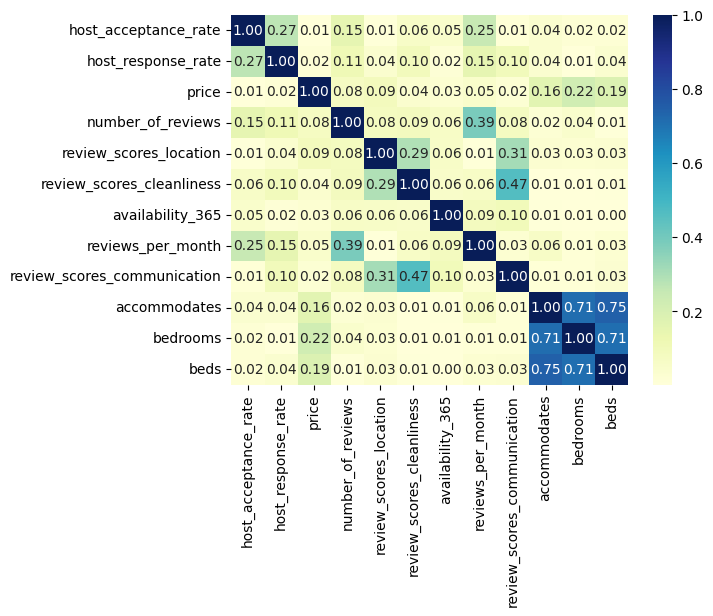

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_map= sns.heatmap(Corr_Factors1, cmap= 'YlGnBu', annot=True, fmt=".2f")
Heat_map

Correlacion mas alta: beds vs accommodates

In [ ]:
#Declarar variable dependiente e independiente
vars_indep=dfmex1[['beds']]
var_dep=dfmex1['accommodates']
model=LinearRegression()
model.fit(X=vars_indep,y=var_dep)
y_pred=model.predict(X=dfmex1[['beds']])
dfmex1.insert(0,'predictions',y_pred)
dfmex1

,predictions,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,2.468300,91.5,100.0,1434.0,21.0,5.00,4.95,324,0.19,4.95,3.0,1.0,1.0
1,2.468300,91.5,94.5,830.0,61.0,4.95,4.88,346,0.54,5.00,2.0,1.0,1.0
2,4.608993,90.0,100.0,1469.0,39.0,4.58,4.71,87,0.31,4.92,6.0,3.0,3.0
3,2.468300,91.5,94.5,3658.0,0.0,4.80,4.70,363,1.70,4.80,2.0,1.0,1.0
4,3.324577,86.0,100.0,18000.0,64.0,4.98,4.70,357,0.46,4.78,3.1,1.5,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24217,2.468300,100.0,100.0,980.0,0.0,4.80,4.70,342,1.70,4.80,2.0,1.0,1.0
24219,2.468300,100.0,100.0,760.0,0.0,4.80,4.70,352,1.70,4.80,2.0,1.0,1.0
24220,4.608993,91.5,94.5,1520.0,0.0,4.80,4.70,365,1.70,4.80,7.0,2.0,3.0
24222,2.468300,100.0,100.0,1200.0,0.0,4.80,4.70,344,1.70,4.80,2.0,1.0,1.0


In [ ]:
#Coeficiente de determinación (r^2)
coef_Deter=model.score(X=vars_indep,y=var_dep)
print("Determinacion:",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("Correlacion",coef_Correl)

Determinacion: 0.5569127574653228
Correlacion 0.746265875854794


<Axes: xlabel='beds', ylabel='accommodates'>

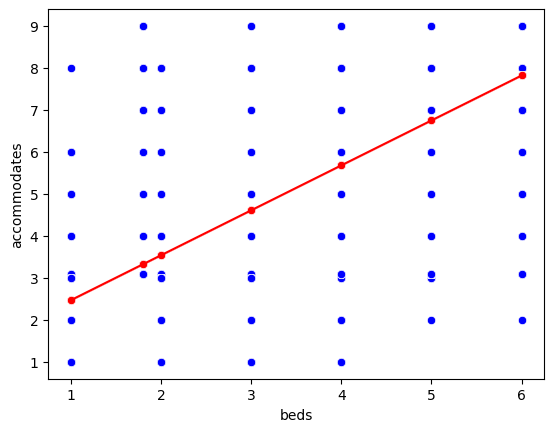

In [ ]:
#Grafica del modelo: real vs predicciones
sns.scatterplot(x="beds",y="accommodates",color="blue",data=dfmex1)
sns.scatterplot(x="beds",y="predictions",color="red",data=dfmex1)
sns.lineplot(x="beds",y="predictions",color="red",data=dfmex1)

Carlos

df2: Mexico - Private room

In [ ]:
# Eliminar la primera columna
copy_dfmex2 = dfmex2.copy()

dfmex2 = dfmex2.iloc[:, 1:]
dfmex2

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
7,100.0,100.0,1089.0,62.0,4.94,4.9,168,0.94,4.95,2.0,1.0,1.0
16,94.7,94.5,726.0,5.0,4.80,4.2,363,0.04,4.60,2.0,1.0,1.0
17,91.5,97.2,375.0,5.0,4.40,4.6,284,0.04,4.80,1.0,1.0,1.0
18,94.7,94.5,2835.0,0.0,4.80,4.7,365,1.70,4.80,2.0,1.0,2.0
21,91.5,100.0,1244.0,0.0,4.80,4.7,88,1.70,4.80,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,91.5,94.5,1280.0,0.0,4.80,4.7,301,1.70,4.80,4.0,1.0,2.0
24213,91.5,94.5,750.0,0.0,4.80,4.7,176,1.70,4.80,2.0,2.0,3.0
24215,100.0,100.0,600.0,0.0,4.80,4.7,345,1.70,4.80,2.0,1.0,1.0
24218,100.0,94.5,251.0,0.0,4.80,4.7,364,1.70,4.80,2.0,1.0,1.0


In [ ]:
#Encontrar todas las correlaciones entre las variables
Corr_Factors2=dfmex2.corr()
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors2 = abs(Corr_Factors2)
Corr_Factors2

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
host_acceptance_rate,1.000000,0.206480,0.005024,0.139882,0.027775,0.010028,0.007810,0.194955,0.053638,0.075057,0.027807,0.003615
host_response_rate,0.206480,1.000000,0.012378,0.098062,0.035760,0.039215,0.012339,0.102549,0.045620,0.008082,0.024381,0.009207
price,0.005024,0.012378,1.000000,0.077522,0.009467,0.001949,0.057518,0.011749,0.016273,0.200141,0.161799,0.137796
number_of_reviews,0.139882,0.098062,0.077522,1.000000,0.086102,0.057744,0.061028,0.401115,0.037879,0.033296,0.098664,0.057438
review_scores_location,0.027775,0.035760,0.009467,0.086102,1.000000,0.349802,0.071324,0.055287,0.405558,0.045320,0.047096,0.041042
review_scores_cleanliness,0.010028,0.039215,0.001949,0.057744,0.349802,1.000000,0.060767,0.050629,0.474781,0.018220,0.019369,0.023657
availability_365,0.007810,0.012339,0.057518,0.061028,0.071324,0.060767,1.000000,0.061866,0.085251,0.042615,0.021779,0.050264
reviews_per_month,0.194955,0.102549,0.011749,0.401115,0.055287,0.050629,0.061866,1.000000,0.078476,0.054513,0.048104,0.037304
review_scores_communication,0.053638,0.045620,0.016273,0.037879,0.405558,0.474781,0.085251,0.078476,1.000000,0.058928,0.007535,0.029897
accommodates,0.075057,0.008082,0.200141,0.033296,0.045320,0.018220,0.042615,0.054513,0.058928,1.000000,0.338690,0.593125


<Axes: >

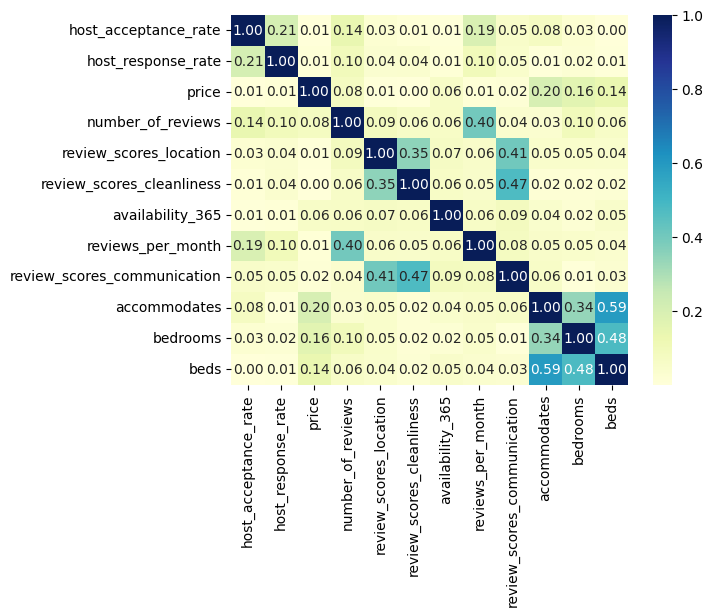

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_map2= sns.heatmap(Corr_Factors2, cmap= 'YlGnBu', annot=True, fmt=".2f")
Heat_map2

Correlacion mas alta: beds vs accommodates

In [ ]:
#Declarar variable dependiente e independiente
vars_indep2=dfmex2[['beds']]
var_dep2=dfmex2['accommodates']
model=LinearRegression()
model.fit(X=vars_indep2,y=var_dep2)
y_pred2=model.predict(X=dfmex2[['beds']])
dfmex2.insert(0,'predictions',y_pred2)
dfmex2

,predictions,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
7,1.706149,100.0,100.0,1089.0,62.0,4.94,4.9,168,0.94,4.95,2.0,1.0,1.0
16,1.706149,94.7,94.5,726.0,5.0,4.80,4.2,363,0.04,4.60,2.0,1.0,1.0
17,1.706149,91.5,97.2,375.0,5.0,4.40,4.6,284,0.04,4.80,1.0,1.0,1.0
18,2.599237,94.7,94.5,2835.0,0.0,4.80,4.7,365,1.70,4.80,2.0,1.0,2.0
21,1.706149,91.5,100.0,1244.0,0.0,4.80,4.7,88,1.70,4.80,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,2.599237,91.5,94.5,1280.0,0.0,4.80,4.7,301,1.70,4.80,4.0,1.0,2.0
24213,3.492326,91.5,94.5,750.0,0.0,4.80,4.7,176,1.70,4.80,2.0,2.0,3.0
24215,1.706149,100.0,100.0,600.0,0.0,4.80,4.7,345,1.70,4.80,2.0,1.0,1.0
24218,1.706149,100.0,94.5,251.0,0.0,4.80,4.7,364,1.70,4.80,2.0,1.0,1.0


In [ ]:
#Coeficiente de determinación (r^2)
coef_Deter2=model.score(X=vars_indep2,y=var_dep2)
print("Determinacion:",coef_Deter2)
coef_Correl2=np.sqrt(abs(coef_Deter2))#Valor absoluto para la raiz porque dio negativo
print("Correlacion",coef_Correl2)

Determinacion: 0.351797221265988
Correlacion 0.5931249626056789


<Axes: xlabel='beds', ylabel='accommodates'>

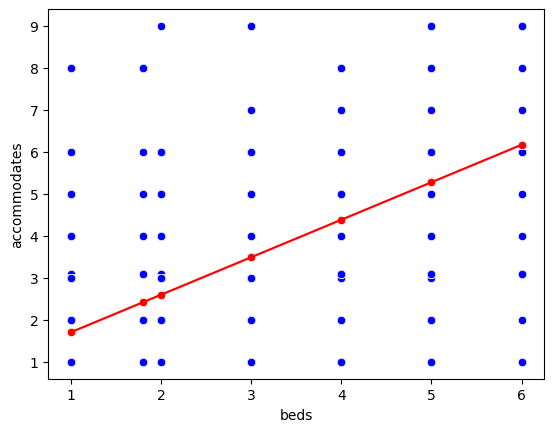

In [ ]:
#Grafica del modelo: real vs predicciones
sns.scatterplot(x="beds",y="accommodates",color="blue",data=dfmex2)
sns.scatterplot(x="beds",y="predictions",color="red",data=dfmex2)
sns.lineplot(x="beds",y="predictions",color="red",data=dfmex2)

Edgar

df3: España - Entire home/apt

In [ ]:
# Hacemos una copia de dfesp1 para preservar la versión original
copy_dfesp1 = dfesp1.copy()

# Eliminamos la primera columna de dfesp1
dfesp1 = dfesp1.iloc[:, 1:]

dfesp1

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
2,80.0,100.0,74.0,74.0,4.74,4.31,315,0.62,4.76,4.0,1.0,2.0
4,92.0,94.4,120.0,11.0,4.91,4.82,0,0.09,4.73,4.0,1.0,1.0
5,100.0,100.0,105.0,29.0,4.79,4.69,278,0.34,4.45,4.0,1.0,2.0
6,100.0,100.0,110.0,15.0,4.50,4.79,336,0.13,4.50,4.0,2.0,2.0
7,89.5,94.4,60.0,10.0,4.56,4.78,56,0.08,5.00,7.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19650,100.0,93.0,209.0,0.0,4.70,4.50,107,0.50,4.70,8.0,4.0,4.0
19651,100.0,100.0,52.0,0.0,4.70,4.50,186,0.50,4.70,4.0,1.0,1.0
19652,50.0,96.2,66.0,0.0,4.70,4.50,269,0.50,4.70,4.0,2.0,3.0
19653,99.0,93.0,108.0,0.0,4.70,4.50,273,0.50,4.70,4.0,2.0,3.0


In [ ]:
# Calculamos las correlaciones entre las variables
Corr_Factors3 = dfesp1.corr()

# Calculamos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors3 = abs(Corr_Factors3)

Corr_Factors3


,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
host_acceptance_rate,1.000000,0.167169,0.028063,0.040715,0.023973,0.014624,0.102783,0.093263,0.027108,0.065648,0.072055,0.064053
host_response_rate,0.167169,1.000000,0.038470,0.121035,0.046894,0.067130,0.048755,0.096451,0.082758,0.021103,0.011144,0.028494
price,0.028063,0.038470,1.000000,0.132257,0.005509,0.015199,0.084590,0.088496,0.004452,0.412213,0.450458,0.383581
number_of_reviews,0.040715,0.121035,0.132257,1.000000,0.113835,0.158917,0.070868,0.499856,0.156852,0.104000,0.092015,0.078158
review_scores_location,0.023973,0.046894,0.005509,0.113835,1.000000,0.282431,0.032939,0.083366,0.335361,0.037878,0.021066,0.014389
review_scores_cleanliness,0.014624,0.067130,0.015199,0.158917,0.282431,1.000000,0.052859,0.122361,0.433898,0.047587,0.017030,0.026781
availability_365,0.102783,0.048755,0.084590,0.070868,0.032939,0.052859,1.000000,0.111640,0.024015,0.018088,0.046702,0.032855
reviews_per_month,0.093263,0.096451,0.088496,0.499856,0.083366,0.122361,0.111640,1.000000,0.109631,0.126858,0.121692,0.125955
review_scores_communication,0.027108,0.082758,0.004452,0.156852,0.335361,0.433898,0.024015,0.109631,1.000000,0.028361,0.001071,0.003670
accommodates,0.065648,0.021103,0.412213,0.104000,0.037878,0.047587,0.018088,0.126858,0.028361,1.000000,0.802008,0.765416


<Axes: >

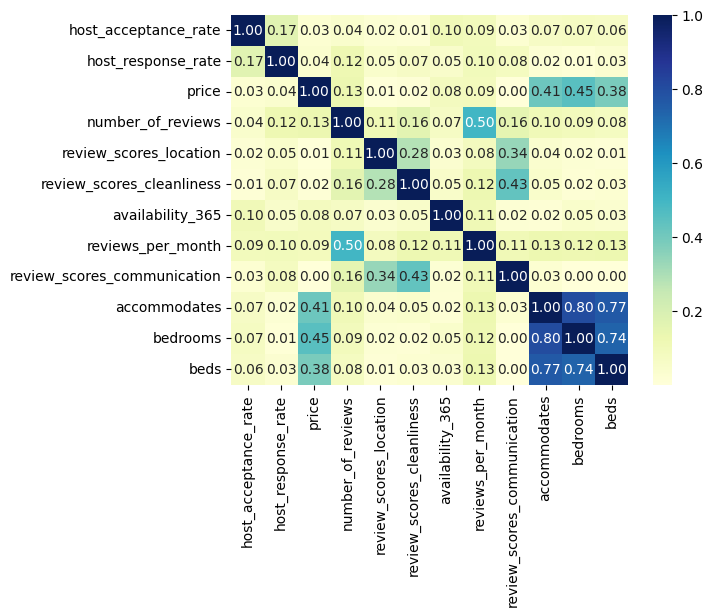

In [ ]:
# Creamos un mapa de calor de los coeficientes de correlación
Heat_map3= sns.heatmap(Corr_Factors3, cmap= 'YlGnBu', annot=True, fmt=".2f")
Heat_map3

In [ ]:
# Declarar variable independiente (predictora)
vars_indep3 = dfesp1[['bedrooms']]

# Declarar variable dependiente (objetivo)
var_dep3 = dfesp1['accommodates']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo utilizando las variables independientes y dependientes
model.fit(X=vars_indep3, y=var_dep3)

# Realizar predicciones utilizando el modelo ajustado
y_pred3 = model.predict(X=dfesp1[['bedrooms']])

# Insertar las predicciones en el DataFrame dfesp1
dfesp1.insert(0, 'predictions', y_pred3)

dfesp1

,predictions,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
2,3.291229,80.0,100.0,74.0,74.0,4.74,4.31,315,0.62,4.76,4.0,1.0,2.0
4,3.291229,92.0,94.4,120.0,11.0,4.91,4.82,0,0.09,4.73,4.0,1.0,1.0
5,3.291229,100.0,100.0,105.0,29.0,4.79,4.69,278,0.34,4.45,4.0,1.0,2.0
6,4.760142,100.0,100.0,110.0,15.0,4.50,4.79,336,0.13,4.50,4.0,2.0,2.0
7,6.229054,89.5,94.4,60.0,10.0,4.56,4.78,56,0.08,5.00,7.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,7.697967,100.0,93.0,209.0,0.0,4.70,4.50,107,0.50,4.70,8.0,4.0,4.0
19651,3.291229,100.0,100.0,52.0,0.0,4.70,4.50,186,0.50,4.70,4.0,1.0,1.0
19652,4.760142,50.0,96.2,66.0,0.0,4.70,4.50,269,0.50,4.70,4.0,2.0,3.0
19653,4.760142,99.0,93.0,108.0,0.0,4.70,4.50,273,0.50,4.70,4.0,2.0,3.0


In [ ]:
# Calcular el coeficiente de determinación (R^2)
coef_Deter3 = model.score(X=vars_indep3, y=var_dep3)
print("Determinacion:", coef_Deter3)

# Calcular la correlación (valor absoluto de la raíz cuadrada de R^2)
coef_Correl3 = np.sqrt(abs(coef_Deter3))
print("Correlacion", coef_Correl3)


Determinacion: 0.6432172038505272
Correlacion 0.8020082317847661


<Axes: xlabel='bedrooms', ylabel='accommodates'>

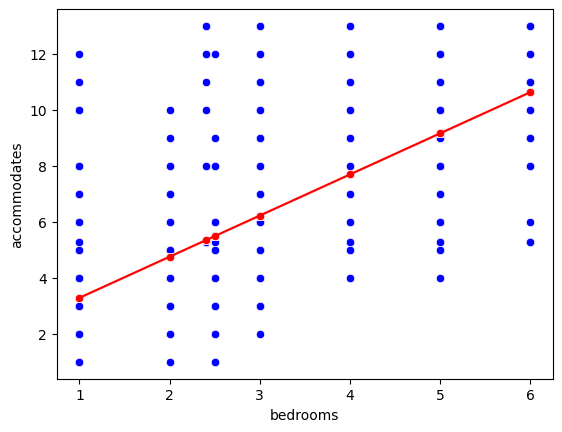

In [ ]:
# Crear un gráfico de dispersión (scatter plot) de las observaciones reales
sns.scatterplot(x="bedrooms", y="accommodates", color="blue", data=dfesp1)
# Crear un gráfico de dispersión (scatter plot) de las predicciones
sns.scatterplot(x="bedrooms", y="predictions", color="red", data=dfesp1)
# Crear una línea que conecte las predicciones
sns.lineplot(x="bedrooms", y="predictions", color="red", data=dfesp1)


Lety

df4: España - Private room

In [ ]:
# Eliminar la primera columna
copy_dfesp2 = dfesp2.copy()

dfesp2 = dfesp2.iloc[:, 1:]
dfesp2

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,90.0,100.0,42.0,56.0,4.63,4.94,293,0.37,4.91,2.0,1.0,1.0
1,42.0,100.0,47.0,60.0,4.69,4.85,282,0.51,4.91,2.0,1.0,1.0
3,91.0,100.0,45.0,9.0,4.63,4.50,248,0.08,5.00,2.0,1.0,2.0
12,91.0,100.0,49.0,10.0,4.70,4.50,247,0.09,5.00,3.0,1.0,2.0
13,91.0,100.0,53.0,11.0,4.36,4.55,247,0.09,4.82,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19534,100.0,99.0,1175.0,0.0,4.70,4.50,122,0.50,4.70,6.0,1.0,3.0
19535,100.0,99.0,1175.0,0.0,4.70,4.50,122,0.50,4.70,4.0,1.0,2.0
19546,89.5,94.4,190.8,0.0,4.70,4.50,9,0.50,4.70,3.0,1.0,6.0
19573,86.0,100.0,96.0,0.0,4.70,4.50,56,0.50,4.70,5.0,2.0,5.0


In [ ]:
#Encontrar todas las correlaciones entre las variables
Corr_Factors4=dfesp2.corr()
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors4 = abs(Corr_Factors4)
Corr_Factors4

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
host_acceptance_rate,1.000000,0.055820,0.002144,0.050501,0.057330,0.070554,0.067589,0.094051,0.033605,0.074006,0.077961,0.061613
host_response_rate,0.055820,1.000000,0.025441,0.110931,0.060808,0.135717,0.081840,0.086069,0.095951,0.087323,0.016262,0.108962
price,0.002144,0.025441,1.000000,0.207679,0.043087,0.147666,0.046080,0.120756,0.082836,0.144900,0.089848,0.171681
number_of_reviews,0.050501,0.110931,0.207679,1.000000,0.009924,0.232884,0.070116,0.483339,0.148433,0.015672,0.001386,0.057796
review_scores_location,0.057330,0.060808,0.043087,0.009924,1.000000,0.388194,0.057800,0.008474,0.392668,0.054675,0.028973,0.045677
review_scores_cleanliness,0.070554,0.135717,0.147666,0.232884,0.388194,1.000000,0.025768,0.035080,0.481878,0.088846,0.013513,0.125307
availability_365,0.067589,0.081840,0.046080,0.070116,0.057800,0.025768,1.000000,0.033742,0.039877,0.017111,0.044722,0.011851
reviews_per_month,0.094051,0.086069,0.120756,0.483339,0.008474,0.035080,0.033742,1.000000,0.046915,0.045692,0.028291,0.084655
review_scores_communication,0.033605,0.095951,0.082836,0.148433,0.392668,0.481878,0.039877,0.046915,1.000000,0.024884,0.009561,0.073401
accommodates,0.074006,0.087323,0.144900,0.015672,0.054675,0.088846,0.017111,0.045692,0.024884,1.000000,0.514234,0.703453


<Axes: >

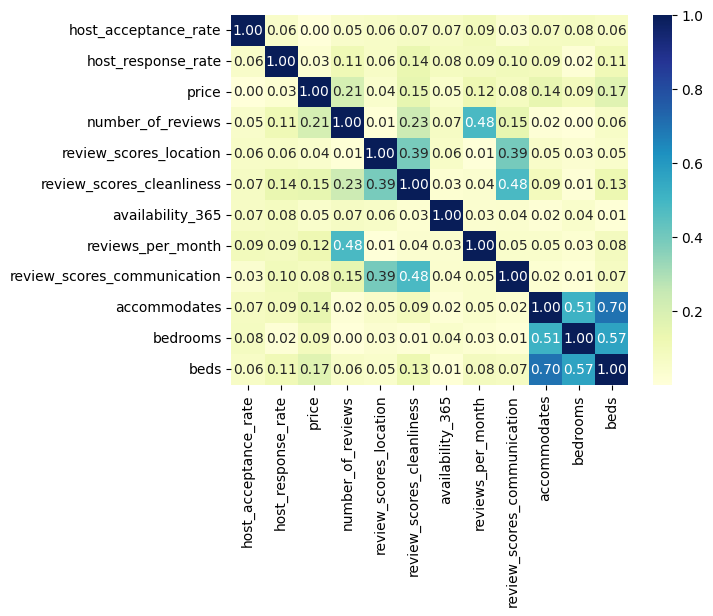

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_map4= sns.heatmap(Corr_Factors4, cmap= 'YlGnBu', annot=True, fmt=".2f")
Heat_map4

In [ ]:
#Declarar variable dependiente e independiente
vars_indep4=dfesp2[['beds']]
var_dep4=dfesp2['accommodates']
model=LinearRegression()
model.fit(X=vars_indep4,y=var_dep4)
y_pred4=model.predict(X=dfesp2[['beds']])
dfesp2.insert(0,'predictions',y_pred4)
dfesp2

,predictions,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,accommodates,bedrooms,beds
0,1.949721,90.0,100.0,42.0,56.0,4.63,4.94,293,0.37,4.91,2.0,1.0,1.0
1,1.949721,42.0,100.0,47.0,60.0,4.69,4.85,282,0.51,4.91,2.0,1.0,1.0
3,2.693227,91.0,100.0,45.0,9.0,4.63,4.50,248,0.08,5.00,2.0,1.0,2.0
12,2.693227,91.0,100.0,49.0,10.0,4.70,4.50,247,0.09,5.00,3.0,1.0,2.0
13,2.693227,91.0,100.0,53.0,11.0,4.36,4.55,247,0.09,4.82,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19534,3.436732,100.0,99.0,1175.0,0.0,4.70,4.50,122,0.50,4.70,6.0,1.0,3.0
19535,2.693227,100.0,99.0,1175.0,0.0,4.70,4.50,122,0.50,4.70,4.0,1.0,2.0
19546,5.667250,89.5,94.4,190.8,0.0,4.70,4.50,9,0.50,4.70,3.0,1.0,6.0
19573,4.923744,86.0,100.0,96.0,0.0,4.70,4.50,56,0.50,4.70,5.0,2.0,5.0


In [ ]:
#Coeficiente de determinación (r^2)
coef_Deter4=model.score(X=vars_indep4,y=var_dep4)
print("Determinacion:",coef_Deter4)
coef_Correl4=np.sqrt(abs(coef_Deter4))#Valor absoluto para la raiz porque dio negativo
print("Correlacion",coef_Correl4)

Determinacion: 0.49484626581631963
Correlacion 0.7034531013623578


<Axes: xlabel='beds', ylabel='accommodates'>

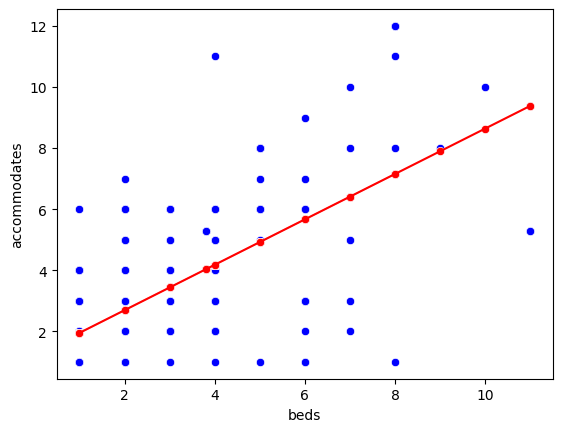

In [ ]:
#Grafica del modelo: real vs predicciones
sns.scatterplot(x="beds",y="accommodates",color="blue",data=dfesp2)
sns.scatterplot(x="beds",y="predictions",color="red",data=dfesp2)
sns.lineplot(x="beds",y="predictions",color="red",data=dfesp2)